Instructions

Option 3 (data_arrhythmia.csv) :
read the dataset details from here https://archive.ics.uci.edu/ml/datasets/arrhythmia

Develop an articial neural network for arrhythmia classification from healthy subjects using single channel ECG

Develop a 1-D convolutional neural network for arrythmiya classification from single channel ECG

Compare the performances of the developed deep learning models

Reference Sources

https://www.hindawi.com/journals/cmmm/2018/7310496/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from keras.layers import Dropout
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_arrhythmia = pd.read_csv('https://raw.githubusercontent.com/juberrahman/Smart-Health/main/Project-3/data_arrhythmia.csv', delimiter=';')
data_arrhythmia

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [4]:
# Removing the values with '?' and replacing them with 0
data_arrhythmia['T']=data_arrhythmia['T'].replace('?',0)

In [5]:
data_arrhythmia['P']=data_arrhythmia['P'].replace('?',0)

In [6]:
data_arrhythmia['QRST']=data_arrhythmia['QRST'].replace('?',0)

In [7]:
data_arrhythmia['J']=data_arrhythmia['J'].replace('?',0)

In [8]:
data_arrhythmia['heart_rate']=data_arrhythmia['heart_rate'].replace('?',0)

In [9]:
data_arrhythmia

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,0,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,0,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,0,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,0,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,0,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [ ]:
data_arrhythmia.to_csv("Data_arrhythmia.csv")

In [10]:
data_arrhythmia.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [11]:
data_arrhythmia['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

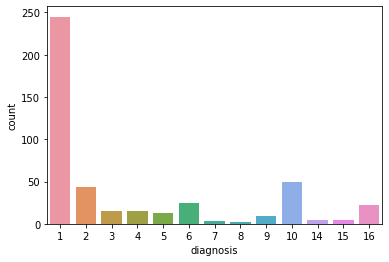

In [12]:
sns.countplot(data_arrhythmia['diagnosis'])

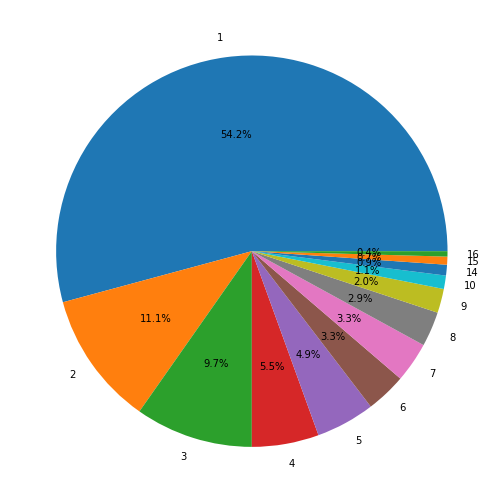

In [13]:
#pie chart of Diagnosis Class
target_dist=data_arrhythmia['diagnosis'].value_counts()
fig = plt.figure(figsize=(10, 9))
plt.pie(target_dist,labels=['1','2','3','4','5','6','7','8','9','10','14','15','16'],autopct='%1.1f%%')
plt.show()

The dataset is composed of 452 samples classified into 16 different classes. 

There are 16 classes as follows

1. Normal
2.Ischemic changes (Coronary Artery Disease
3.Old Anterior Myocardial Infarction
4.Old Inferior Myocardial Infarction
5.Sinus tachycardy
6.Sinus bradycardy
7.Ventricular Premature Contraction (PVC)
8.Supraventricular Premature Contraction
9.Left bundle branch block
10.Right bundle branch block
11. degree AtrioVentricular block
12. degree AV block
13. degree AV block
14. Left ventricule hypertrophy
15. Atrial Fibrillation or Flutter
16. Others

However only first one is a normal kind of arrythmia where the other classes can be superclassed as risky arrythmia cases. In this notebook, all cases are classified as either normal or risky. Risky being the positive (1) case and normal being the negative (0) case, diagnosis column is reworked as follows.

0 ==== Healthy

1 ==== Risky Cases

In [14]:
norm_risk_list = []
for diagnose in data_arrhythmia.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(0)
    else:
        norm_risk_list.append(1)
data_arrhythmia["label"] = np.array(norm_risk_list)
data_arrhythmia.drop(columns = ["diagnosis"],inplace = True)
data_arrhythmia.label.value_counts()

0    245
1    207
Name: label, dtype: int64

In [15]:
data_arrhythmia.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,label
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,0,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,0,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,1
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,0,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,0
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,1


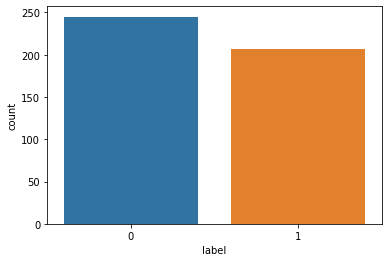

In [16]:
sns.countplot(data_arrhythmia['label'])

The data seems to be balanced between the healthy and Risky persons. Hence no resampling is done.

In [17]:
X=data_arrhythmia.drop(['label'], axis=1)
y=data_arrhythmia['label']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.25, random_state=10 )

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 279)
(113, 279)
(339,)
(113,)


In [20]:
X_train

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JN,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
337,33,1,165,58,76,130,333,160,71,64,56,67,60,0,92,0,44,36,0,0,24,0,0,0,0,0,0,0,48,32,0,0,28,0,0,0,0,0,0,0,...,-0.7,0.0,7.2,-5.4,0.0,0.0,0.8,5.8,6.4,57.4,-1.0,0.0,11.4,-4.8,0.0,0.0,1.1,4.6,17.7,57.2,-1.2,0.0,12.0,-3.0,0.0,0,0.9,2.2,23.4,38.8,-0.9,0.0,10.1,-1.8,0.0,0,0.8,1.6,19.0,33.7
382,36,0,185,95,96,159,330,159,102,52,-23,58,40,0,85,0,52,20,0,0,32,0,0,0,0,0,0,0,60,0,0,0,24,0,0,0,0,0,0,20,...,1.3,0.0,8.6,-10.4,0.0,0.0,0.4,4.3,1.5,46.2,0.1,0.0,17.1,-7.2,0.0,0.0,0.6,2.8,26.6,49.0,-0.3,0.0,17.2,-2.9,0.0,0,0.7,1.7,38.4,52.0,-0.2,0.0,13.2,0.0,0.0,0,0.8,0.9,39.6,45.7
307,53,0,171,79,80,169,363,135,83,1,11,41,3,0,50,20,72,0,0,0,44,0,0,0,0,0,0,0,72,0,0,0,24,0,0,0,0,0,0,48,...,-0.1,0.0,10.9,-4.9,0.0,0.0,0.4,4.9,14.1,55.2,-0.4,-0.4,16.1,-1.2,0.0,0.0,0.5,3.0,33.0,52.8,-0.1,-0.5,10.7,0.0,0.0,0,0.4,1.7,35.7,45.5,0.0,-0.4,6.3,0.0,0.0,0,0.4,1.0,23.5,29.1
225,67,0,171,67,90,184,351,262,96,62,48,71,57,0,81,24,36,0,0,0,36,0,0,0,0,0,0,0,76,0,0,0,16,0,0,0,0,0,0,0,...,0.7,-5.8,0.0,0.0,0.0,0.0,0.2,2.0,-26.6,-0.2,0.0,-3.1,6.8,-2.9,0.0,0.0,0.8,0.8,-1.8,1.2,-0.1,-1.6,8.2,-1.4,0.0,0,0.9,0.8,11.7,16.1,-0.1,-0.6,6.3,0.0,0.0,0,0.8,0.9,14.4,19.4
413,53,1,160,60,86,133,338,159,82,74,36,53,60,0,80,0,40,40,0,0,24,0,0,0,0,0,0,12,84,0,0,0,32,0,1,0,0,0,0,20,...,0.5,0.0,15.1,-20.5,0.0,0.0,0.9,3.1,1.2,34.0,1.4,0.0,16.3,-18.2,0.0,0.0,1.2,3.6,6.4,40.2,0.1,0.0,12.4,-7.9,0.0,0,1.1,1.8,-3.6,10.4,0.0,-0.4,11.6,-5.3,0.0,0,1.0,2.1,0.5,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,50,1,163,58,84,145,370,143,73,0,0,41,0,0,76,20,64,0,0,0,40,0,0,1,0,0,0,0,52,0,0,0,20,0,0,0,0,0,0,64,...,0.6,0.0,2.0,-8.0,0.0,0.0,0.3,2.0,-15.6,6.0,0.0,0.0,4.0,-5.1,0.0,0.0,0.4,0.9,-5.4,0.9,-0.1,0.0,5.8,-2.6,0.0,0,0.4,1.3,6.0,16.1,-0.1,0.0,6.3,-0.6,0.0,0,0.4,1.4,16.4,27.3
135,40,0,172,60,87,146,352,160,89,81,55,74,73,0,58,0,36,48,0,0,20,0,0,0,0,0,0,0,88,0,0,0,24,0,0,0,0,0,0,0,...,0.9,0.0,5.2,-14.5,0.0,0.0,-0.7,7.0,-27.3,37.1,-0.4,0.0,19.3,-8.4,0.0,0.0,0.9,4.0,26.2,64.6,-0.5,0.0,16.6,-2.5,0.0,0,0.9,2.2,31.0,48.1,-0.1,0.0,11.3,0.0,0.0,0,0.8,1.3,38.4,47.7
42,30,1,160,62,92,154,346,158,96,54,48,64,52,0,91,20,44,36,0,0,40,0,0,0,0,0,0,0,52,0,0,0,24,0,0,0,0,0,0,0,...,-0.5,0.0,11.2,-5.8,0.0,0.0,0.9,4.1,22.0,53.9,-1.1,-0.6,17.6,-3.8,0.0,0.0,1.1,3.0,31.3,49.9,-0.7,-0.7,11.6,-1.9,0.0,0,1.0,2.1,21.4,34.4,-0.4,-0.7,8.6,-1.0,0.0,0,0.9,1.5,16.4,25.7
5,13,0,169,51,100,167,321,174,91,107,66,52,88,0,84,0,36,48,0,0,20,0,0,0,0,0,0,20,44,36,0,0,44,0,0,0,0,0,0,24,...,2.0,-0.8,19.8,-48.4,0.0,0.0,1.6,8.7,-114.5,-72.8,2.0,0.0,31.0,-25.7,0.0,0.0,0.8,5.9,29.2,85.8,0.6,0.0,19.5,-11.4,0.0,0,0.8,3.3,20.1,49.1,0.0,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1


In [21]:
y_train

337    0
382    0
307    1
225    1
413    0
      ..
289    0
135    0
42     0
5      1
231    1
Name: label, Length: 339, dtype: int64

In [22]:
X = np.asarray(X).astype(np.float32)

In [23]:
y=np.asarray(y).astype(np.float32)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [25]:
y_cat = to_categorical(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.25)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 279)
(113, 279)
(339, 2)
(113, 2)


**Simple ANN (Performing multi-class Classification)**

In [28]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [29]:
model1 = Sequential()
model1.add(Dense(60, input_shape = (279,), activation = "relu"))
model1.add(Dense(15, activation = "relu"))
model1.add(Dropout(0.2))
model1.add(Dense(2, activation = "softmax"))
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                16800     
                                                                 
 dense_1 (Dense)             (None, 15)                915       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 32        
                                                                 
Total params: 17,747
Trainable params: 17,747
Non-trainable params: 0
_________________________________________________________________


In [32]:
batch_size=100
model1.fit(X_train, y_train,batch_size=batch_size,verbose=1, epochs=10, validation_split=0.25)

Epoch 1/10
3/3 [==============================] - 0s 37ms/step - loss: 0.1587 - accuracy: 0.9528 - val_loss: 0.8644 - val_accuracy: 0.7176
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 0.1368 - accuracy: 0.9488 - val_loss: 0.8723 - val_accuracy: 0.7059
Epoch 3/10
3/3 [==============================] - 0s 21ms/step - loss: 0.1283 - accuracy: 0.9488 - val_loss: 0.8770 - val_accuracy: 0.7059
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.1119 - accuracy: 0.9803 - val_loss: 0.8763 - val_accuracy: 0.7059
Epoch 5/10
3/3 [==============================] - 0s 20ms/step - loss: 0.1030 - accuracy: 0.9724 - val_loss: 0.8739 - val_accuracy: 0.7176
Epoch 6/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0958 - accuracy: 0.9764 - val_loss: 0.8729 - val_accuracy: 0.7176
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0884 - accuracy: 0.9843 - val_loss: 0.8745 - val_accuracy: 0.7176
Epoch 8/10
3/3 [===========

In [33]:
score, acc = model1.evaluate(X_test, y_test,batch_size=batch_size, verbose=1)

2/2 [==============================] - 0s 8ms/step - loss: 0.6958 - accuracy: 0.7611


In [34]:
print("Test Accuracy:", acc)

Test Accuracy: 0.76106196641922


In [36]:
#y_pred_class = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm=confusion_matrix(y_test_class, y_pred_class)
cm

array([[50,  7],
       [20, 36]])

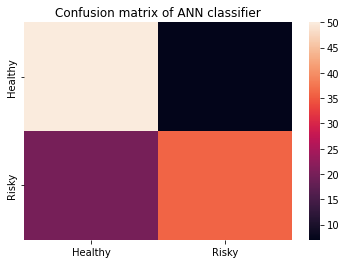

In [37]:
ax= plt.subplot()
sns.heatmap(cm)
ax.set_title('Confusion matrix of ANN classifier')
ax.xaxis.set_ticklabels(['Healthy', 'Risky']); ax.yaxis.set_ticklabels(['Healthy', 'Risky']);

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        57
           1       0.84      0.64      0.73        56

    accuracy                           0.76       113
   macro avg       0.78      0.76      0.76       113
weighted avg       0.78      0.76      0.76       113



The Accuracy Score using the ANN model is 76% . This can be further improved by adjusting the epoch numbers and the test data split also. Also the confusion matrix shows that lot of Risky cases have been categorized incorrectly as Healthy and also some Healthy cases as Risky. We can try other models to see if this improves

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

**CNN**

In [39]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [40]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (339, 279)
X Test shape:  (113, 279)


In [41]:
print("y Train shape: ", y_train.shape)
print("y Test shape: ", y_test.shape)

y Train shape:  (339, 2)
y Test shape:  (113, 2)


In [42]:
#Reshape train and test data 
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [43]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (339, 279, 1)
X Test shape:  (113, 279, 1)


**Basic Sequential Model CNN (with 1 convolutional layer and 3 dense layers)**

In [44]:
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [46]:
model2 = Sequential()
model2.add(Conv1D(64, 2, activation="relu", input_shape=(279,1)))
model2.add(Dense(32, activation="relu"))
model2.add(MaxPooling1D())
model2.add(Flatten())
model2.add(Dense(20, activation = 'softmax'))
model2.add(tf.keras.layers.Dense(2, activation=tf.nn.sigmoid))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 278, 64)           192       
                                                                 
 dense_6 (Dense)             (None, 278, 32)           2080      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 139, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4448)              0         
                                                                 
 dense_7 (Dense)             (None, 20)                88980     
                                                                 
 dense_8 (Dense)             (None, 2)                 42        
                                                      

In [47]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
acc = model2.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

11/11 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.4454
Loss: 0.6961268782615662  Accuracy: 0.44542771577835083


In [63]:
model2_history = model2.fit(X_train, y_train, epochs=20, batch_size = 20,validation_split=0.25)

Epoch 1/20
13/13 [==============================] - 0s 17ms/step - loss: 0.2217 - accuracy: 0.9567 - val_loss: 0.2284 - val_accuracy: 0.9529
Epoch 2/20
13/13 [==============================] - 0s 14ms/step - loss: 0.2207 - accuracy: 0.9567 - val_loss: 0.2275 - val_accuracy: 0.9529
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.2197 - accuracy: 0.9567 - val_loss: 0.2267 - val_accuracy: 0.9529
Epoch 4/20
13/13 [==============================] - 0s 15ms/step - loss: 0.2188 - accuracy: 0.9567 - val_loss: 0.2259 - val_accuracy: 0.9529
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.2178 - accuracy: 0.9567 - val_loss: 0.2250 - val_accuracy: 0.9529
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.2169 - accuracy: 0.9567 - val_loss: 0.2242 - val_accuracy: 0.9529
Epoch 7/20
13/13 [==============================] - 0s 13ms/step - loss: 0.2160 - accuracy: 0.9567 - val_loss: 0.2234 - val_accuracy: 0.9529
Epoch 8/20
13

In [64]:
#Confusion Matrix
y_pred = model2.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm2=confusion_matrix(y_test_class, y_pred_class)
cm2

array([[53,  4],
       [23, 33]])

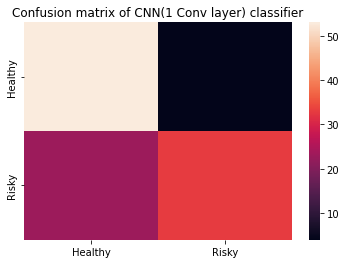

In [65]:
ax= plt.subplot()
sns.heatmap(cm2)
ax.set_title('Confusion matrix of CNN(1 Conv layer) classifier')
ax.xaxis.set_ticklabels(['Healthy', 'Risky']); ax.yaxis.set_ticklabels(['Healthy', 'Risky']);

The Accuracy score after runing the model for 20 apochs and batch size of 20 has improved as compared to the ANN model but the confusion matrix almost looks the same. The Accuracy on the validation data has increased to 95%

**Basic Sequential Model CNN (with 3 convolutional layer and 3 dense layers)**

In [66]:
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
# Drop out layer
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with 2 outputs
cnn_model.add(Dense(units = 2, activation='softmax'))

In [67]:
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
acc = cnn_model.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

11/11 [==============================] - 1s 29ms/step - loss: 0.6955 - accuracy: 0.4395
Loss: 0.6954947710037231  Accuracy: 0.4395280182361603


In [69]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=20, batch_size = 20, validation_split=0.25)

Epoch 1/20
13/13 [==============================] - 2s 101ms/step - loss: 0.7134 - accuracy: 0.5472 - val_loss: 0.6244 - val_accuracy: 0.5765
Epoch 2/20
13/13 [==============================] - 1s 101ms/step - loss: 0.4706 - accuracy: 0.7795 - val_loss: 0.6135 - val_accuracy: 0.7412
Epoch 3/20
13/13 [==============================] - 1s 91ms/step - loss: 0.3743 - accuracy: 0.8386 - val_loss: 0.5980 - val_accuracy: 0.7412
Epoch 4/20
13/13 [==============================] - 1s 89ms/step - loss: 0.2801 - accuracy: 0.8858 - val_loss: 0.6878 - val_accuracy: 0.6706
Epoch 5/20
13/13 [==============================] - 1s 90ms/step - loss: 0.2183 - accuracy: 0.9173 - val_loss: 0.8037 - val_accuracy: 0.7059
Epoch 6/20
13/13 [==============================] - 1s 95ms/step - loss: 0.1377 - accuracy: 0.9567 - val_loss: 1.0614 - val_accuracy: 0.6824
Epoch 7/20
13/13 [==============================] - 1s 92ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 1.5413 - val_accuracy: 0.7294
Epoch 8/20


In [70]:
#Confusion Matrix
y_pred = cnn_model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm3=confusion_matrix(y_test_class, y_pred_class)
cm3

array([[50,  7],
       [25, 31]])

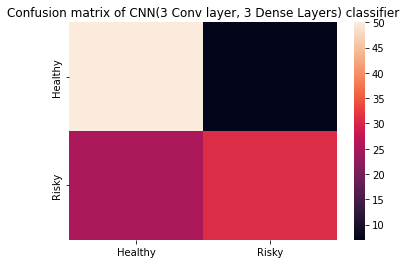

In [71]:
ax= plt.subplot()
sns.heatmap(cm3)
ax.set_title('Confusion matrix of CNN(3 Conv layer, 3 Dense Layers) classifier')
ax.xaxis.set_ticklabels(['Healthy', 'Risky']); ax.yaxis.set_ticklabels(['Healthy', 'Risky']);

From the above values, it can be observed that the validation accuracy and the loss value keeps fluctuating.

Increasing the training epochs or batch size has not been much helpful in this case. 

For current scenario, the best model is created till the point both val_loss and train_loss continues to decrease before it becomes saturated. To address the problem, we need to add noise in the training data so that the model generalizes better, generalize the examples better, create balanced categories in terms of training data volume.

Conclusion#

The CNN model with 1 convolutional layer seems to be having the best accuracy score and the least loss function as compared to other models. This analysis has been done keeping all the features in place.

But further models can be applied after applying the feature selection function and running the models only with the features having the most importance. This might improve the performance and the prediction accuracy of the model. The code to find the best features is given below.

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, stratify=y, test_size=0.25, random_state=10 )

In [80]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(339, 279)
(113, 279)
(339,)
(113,)


In [81]:
# feature selection
def select_features(X_train1, y_train1, X_test1):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train1, y_train1)
	# transform train input data
	X_train_fs = fs.transform(X_train1)
	# transform test input data
	X_test_fs = fs.transform(X_test1)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.160630
Feature 1: 17.443314
Feature 2: 0.680998
Feature 3: 0.390150
Feature 4: 38.577350
Feature 5: 1.069530
Feature 6: 0.337973
Feature 7: 11.739835
Feature 8: 8.539270
Feature 9: 2.128141
Feature 10: 0.173045
Feature 11: 0.292354
Feature 12: 0.209820
Feature 13: 1.091368
Feature 14: 2.777356
Feature 15: 0.389224
Feature 16: 0.251945
Feature 17: 8.762816
Feature 18: 2.391039
Feature 19: nan
Feature 20: 2.414019
Feature 21: 1.187756
Feature 22: 0.029667
Feature 23: 0.066588
Feature 24: 2.391039
Feature 25: 2.391039
Feature 26: 3.610154
Feature 27: 2.359958
Feature 28: 0.298415
Feature 29: 10.870743
Feature 30: 0.293290
Feature 31: nan
Feature 32: 4.795305
Feature 33: 0.029667
Feature 34: 4.642140
Feature 35: 1.187756
Feature 36: 0.014745
Feature 37: 0.014745
Feature 38: 2.405499
Feature 39: 0.872813
Feature 40: 2.289738
Feature 41: 0.721911
Feature 42: 0.067638
Feature 43: 1.612732
Feature 44: 2.881237
Feature 45: 0.841998
Feature 46: 0.001007
Feature 47: 0.841998
Feature 

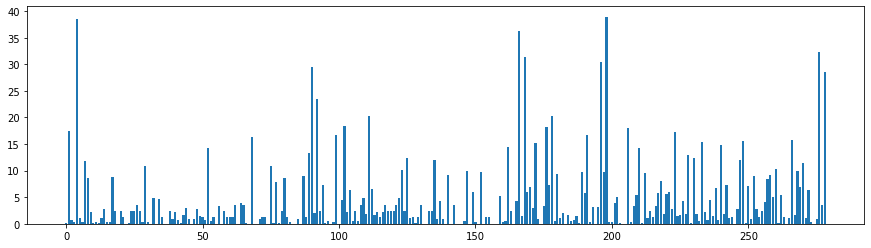

In [83]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train1, y_train1, X_test1)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(15,4))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()